## Árboles de decisión

Conjunto de preguntas binarias:

<img src=https://amueller.github.io/ml-workshop-2-of-4/slides/images/tree_illustration.png width=350>

Si las variables son continuas, las "preguntas" son umbrales numéricos:

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

data = load_iris()
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(data.data, data.target)

DecisionTreeClassifier(max_depth=2)

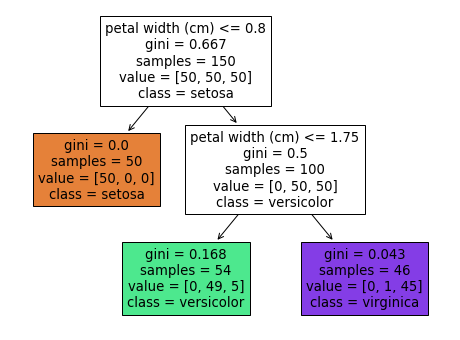

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names, filled=True);

Los árboles de decisión son modelos no lineales que particionan el espacio en regiones rectangulares:

<img src=https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_dtc_001.png width=500>

Fuente: [Plot the decision surface of a decision tree on the iris dataset](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py)

### Construcción del árbol

Existen varios algoritmos para construir un árbol binario. scikit-learn implementa CART (*Classification and Regression Trees*), que sirva tanto para problemas de **clasificación** como de **regresión**. Boceto del algoritmo:

   * Dada una variable $j$ y un umbral $t$, podemos crear dos particiones de los datos:
    
        1. $P_\text{izquierda}(j, t)$, filas de $X$ donde $X_j \leq t$
        2. $P_\text{derecha}(j, t)$, filas de $X$ donde $X_j > t$
   
   
   * Para cada partición y dada una función de impureza $H$, calculamos la impureza total sumando la de ambas particiones:
   
       $$G(P, j, t) = \frac{n_\text{izquierda}}{n} H\big(P_\text{izquierda}(j, t)\big) + \frac{n_\text{derecha}}{n} H\big(P_\text{derecha}(j, t)\big)$$
      
      
   * Elegimos la partición que minimiza la impureza (es decir, la variable $j$ y el umbral $t$)
   
Existen varias funciones de impureza. Para **clasificación** la más habitual es el índice de Gini:

   $$H(X_m) = \sum_k p_{mk}(1 - p_{mk})$$

donde $p_{mk}$ es la proporción de observaciones de la clase $k$ en el nodo $m$. Los valores extremos de este índice son:

   * **Caso mejor**: todos los ejemplos bien clasificados, índice de Gini = 0
   
   * **Caso peor**: mismo número de ejemplos de todas las clases, índice de Gini = 1 - 1/número de clases (la partición no proporciona ninguna información)

Para **regresión**, la predicción de un nodo es la media de todas las muestras que están en ese nodo. Como medidas de impureza, podemos calcular el error cuadrático medio o el error absoluto medio.

In [16]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor, plot_tree

data = load_boston()
tree = DecisionTreeRegressor(max_depth=2)
tree.fit(data.data, data.target)

DecisionTreeRegressor(max_depth=2)

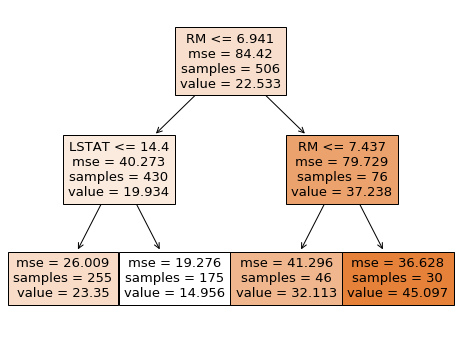

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plot_tree(tree, feature_names=data.feature_names, filled=True);

In [21]:
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
df['pred'] = tree.predict(data.data)

In [23]:
df[['RM', 'LSTAT', 'pred']].head(10)

,RM,LSTAT,pred
0,6.575,4.98,23.349804
1,6.421,9.14,23.349804
2,7.185,4.03,32.113043
3,6.998,2.94,32.113043
4,7.147,5.33,32.113043
5,6.430,5.21,23.349804
6,6.012,12.43,23.349804
7,6.172,19.15,14.956000
8,5.631,29.93,14.956000
9,6.004,17.10,14.956000


### Sobreajuste y selección parámetros

Los árboles son modelos muy flexibles y por tanto propensos al sobreajuste. Existen varios parámetros para controlar el crecimiento del árbol:

   * `max_depth`, profundidad máxima del árbol
   
   * `max_leaf_nodes`, máximo número de nodos hoja (nodos con predicciones)
   
   * `min_samples_split`, mínimo número de muestras para partir un nodo
   
   * `min_impurity_decrease`, valor mínimo de la función de *impurity* para partir un nodo
   
Los parámetros anteriores son similares, es decir, todos controlan de alguna forma la profundidad. A la hora de buscar parámetros no es necesario usar todos, con uno o dos es suficiente. [Notebook con visualización interactiva de parámetros](plot_tree.ipynb)

Otra opción es podar el árbol a posteriori. Esto se puede hacer con el parámetro `ccp_alpha` o la función `cost_complexity_pruning`: 

  * [Post pruning decision trees with cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html))
  
  * [Minimal cost complexity pruning](https://scikit-learn.org/stable/modules/tree.html#minimal-cost-complexity-pruning)

In [45]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

data = load_wine()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

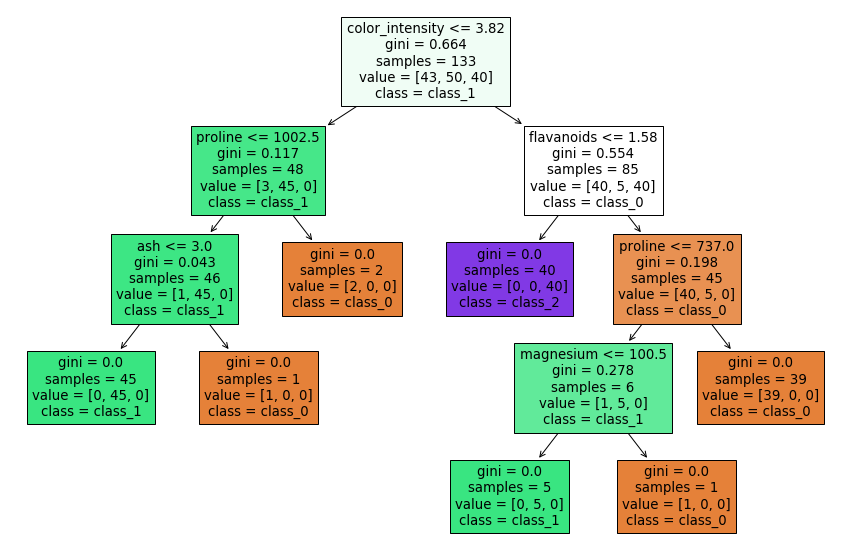

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=data.feature_names, class_names=data.target_names, filled=True);

In [47]:
tree.score(X_train, y_train)

1.0

In [48]:
tree.score(X_test, y_test)

0.9333333333333333

### Interpretabilidad

Una de las principales ventajas de los árboles es que son modelos muy interpretables, ya que podemos extraer exactamente las reglas que se usan para predecir una nueva observación. En ocasiones se prefiere un modelo más interpretable aunque tenga una menor tasa de acierto.

También se puede obtener una medida de la "importancia" de cada variable:

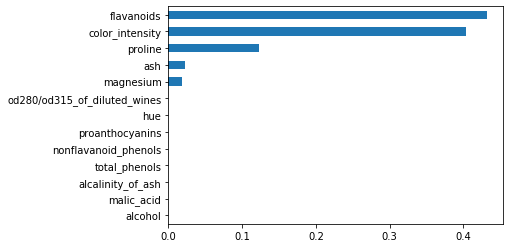

In [55]:
import pandas as pd

pd.Series(tree.feature_importances_, index=data.feature_names).sort_values().plot(kind='barh');

Cuidado con esta medida, está sesgada entre otras cosas porque se calcula sobre el conjunto de entrenamiento (veremos más detalles en *random forest*).

### Ventajas y desventajas

Además de lo que ya hemos visto, los árboles de decisión tienen más ventajas:

   * Pueden manejar **variables categóricas** de forma directa (**no implementado en scikit-learn, pero en camino**)
   
   * **Rápidos** de ajustar y predecir
   
Sin embargo, tienen otros problemas:

   * Modelos muy sencillos, propensos a **sobreajuste**
   
   * **Inestables**, es decir, distintas particiones de los datos pueden crear árboles muy distintos

### Ejercicio

 * Con los datos `adult`, crea una partición entrenamiento-test
 
 * Ajusta un árbol de decisión, visualiza el árbol y calcula el error de entrenamiento y test. ¿Observas sobreajuste?
 
 * Busca los parámetros óptimos. Prueba al menos diferentes valores de `max_leaf_nodes` y `max_depth`
 
 * Visualiza el árbol resultante y la importancia de las variables